In [1]:
#Import the libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')


Bad key savefig.frameon in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [2]:
#Get the stock quote
df = pd.read_csv('ltcprices.csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['date'].values))
#Show the data
df.tail(5)

,symbol,date,close,volume
2021-01-12,LTC/USD,2021-01-12,133.35,149491.125466
2021-01-13,LTC/USD,2021-01-13,147.54,84780.355390
2021-01-14,LTC/USD,2021-01-14,152.47,100389.311524
2021-01-15,LTC/USD,2021-01-15,144.00,86690.566890
2021-01-16,LTC/USD,2021-01-16,147.47,40781.774317


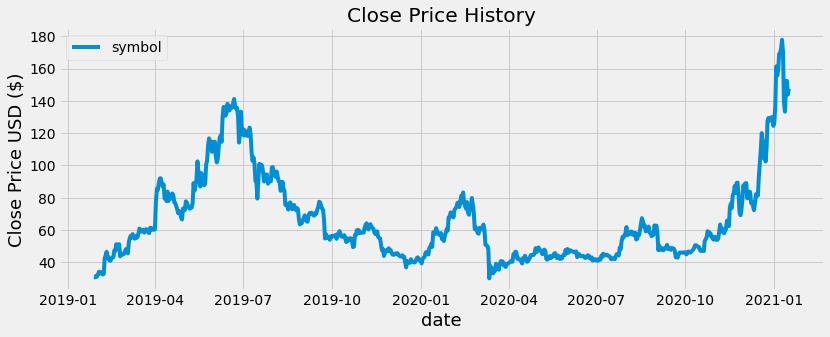

In [3]:
#Visually Show The Stock Price
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df['close'],  label='Close Price')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)  
plt.title('Close Price History')
plt.xlabel('date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [4]:
#Calculate the typical price
typical_price = df["close"]
typical_price

2019-01-28     30.88
2019-01-29     30.67
2019-01-30     31.59
2019-01-31     31.17
2019-02-01     32.43
2019-02-02     34.17
2019-02-03     33.06
2019-02-04     33.61
2019-02-05     33.92
2019-02-06     32.44
2019-02-07     32.78
2019-02-08     42.52
2019-02-09     44.24
2019-02-10     46.50
2019-02-11     42.37
2019-02-12     43.25
2019-02-13     41.27
2019-02-14     40.96
2019-02-15     42.15
2019-02-16     42.93
2019-02-17     43.28
2019-02-18     47.40
2019-02-19     47.01
2019-02-20     51.22
2019-02-21     48.17
2019-02-22     49.27
2019-02-23     51.25
2019-02-24     43.66
2019-02-25     45.33
2019-02-26     44.71
               ...  
2020-12-18    109.47
2020-12-19    120.06
2020-12-20    114.73
2020-12-21    104.53
2020-12-22    114.60
2020-12-23    102.45
2020-12-24    111.28
2020-12-25    127.74
2020-12-26    129.48
2020-12-27    127.66
2020-12-28    129.64
2020-12-29    128.69
2020-12-30    130.02
2020-12-31    124.55
2021-01-01    126.45
2021-01-02    136.92
2021-01-03   

In [5]:
period =  14 #The typical period used for MFI is 14 days

In [6]:
#Calculate the money flow
money_flow = typical_price * df['volume']
money_flow

2019-01-28    1.568690e+05
2019-01-29    6.850341e+04
2019-01-30    7.493992e+04
2019-01-31    1.717946e+05
2019-02-01    1.920506e+05
2019-02-02    1.712348e+05
2019-02-03    9.297214e+04
2019-02-04    1.977680e+05
2019-02-05    1.431823e+05
2019-02-06    4.635413e+05
2019-02-07    5.212580e+04
2019-02-08    1.223648e+06
2019-02-09    4.588214e+05
2019-02-10    7.580365e+05
2019-02-11    6.681524e+05
2019-02-12    1.867384e+05
2019-02-13    2.592160e+05
2019-02-14    2.036292e+05
2019-02-15    3.100484e+05
2019-02-16    3.230329e+05
2019-02-17    3.579495e+05
2019-02-18    6.643049e+05
2019-02-19    3.159876e+05
2019-02-20    9.973699e+05
2019-02-21    4.433026e+05
2019-02-22    2.344592e+05
2019-02-23    7.125853e+05
2019-02-24    1.145316e+06
2019-02-25    3.964987e+05
2019-02-26    1.896009e+05
                  ...     
2020-12-18    1.503598e+07
2020-12-19    1.909196e+07
2020-12-20    1.770847e+07
2020-12-21    2.060922e+07
2020-12-22    1.702948e+07
2020-12-23    1.987144e+07
2

In [7]:
#Get all of the positive and negative money flows 
#where the current typical price is higher than the previous day's typical price, we will append that days money flow to a positive list
#and where the current typical price is lower than the previous day's typical price, we will append that days money flow to a negative list
#and set any other value to 0 to be used when summing
positive_flow =[] #Create a empty list called positive flow
negative_flow = [] #Create a empty list called negative flow
#Loop through the typical price 
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]: #if the present typical price is greater than yesterdays typical price
    positive_flow.append(money_flow[i-1])# Then append money flow at position i-1 to the positive flow list
    negative_flow.append(0) #Append 0 to the negative flow list
  elif typical_price[i] < typical_price[i-1]:#if the present typical price is less than yesterdays typical price
    negative_flow.append(money_flow[i-1])# Then append money flow at position i-1 to negative flow list
    positive_flow.append(0)#Append 0 to the positive flow list
  else: #Append 0 if the present typical price is equal to yesterdays typical price
    positive_flow.append(0)
    negative_flow.append(0)

In [8]:
#Get all of the positive and negative money flows within the time period
positive_mf =[]
negative_mf = [] 
#Get all of the positive money flows within the time period
for i in range(period-1, len(positive_flow)):
  positive_mf.append(sum(positive_flow[i+1-period : i+1]))
#Get all of the negative money flows within the time period  
for i in range(period-1, len(negative_flow)):
  negative_mf.append(sum(negative_flow[i+1-period : i+1]))

In [9]:
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf)  + np.array(negative_mf) ))
mfi

array([69.13344641, 75.77688617, 72.52049047, 69.86856622, 70.05772016,
       70.73859233, 74.77634837, 75.96861178, 66.87521985, 70.08444685,
       57.72768904, 60.03388166, 53.63787425, 44.39230716, 58.660565  ,
       50.89316519, 53.76414688, 57.10842622, 56.43218094, 55.98743361,
       52.63698649, 48.12063503, 55.9707655 , 59.18633561, 73.22125878,
       63.35972806, 65.33857589, 70.0563855 , 59.30055522, 67.38683863,
       57.90775179, 57.29185863, 57.64295099, 57.5216208 , 46.90268303,
       44.48858763, 46.54636799, 43.39591991, 37.44571335, 44.73843314,
       39.95977249, 41.05116244, 40.85772591, 35.31862979, 43.94897798,
       39.01657632, 39.98904585, 35.23135769, 47.44851655, 55.16756514,
       51.86416161, 66.2047382 , 43.27777066, 47.64572123, 53.2912125 ,
       59.92321802, 56.29652913, 52.10411866, 53.34930686, 50.58205877,
       45.5163476 , 44.32777938, 44.48583697, 43.32579829, 44.79701496,
       35.44603009, 47.67989086, 44.43322639, 36.50546857, 25.99

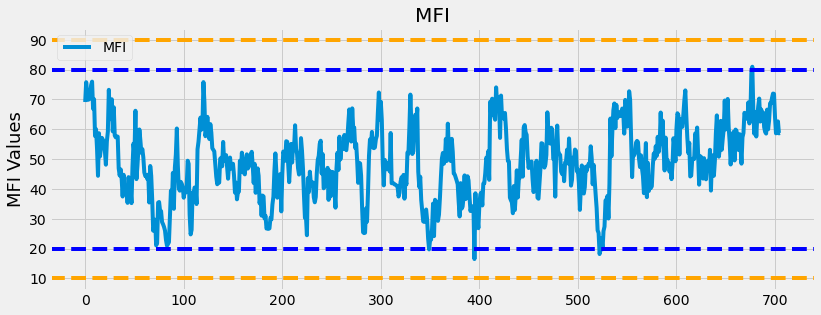

In [10]:
# Visually Show The Money Flow Index
df2 = pd.DataFrame()
df2['MFI'] = mfi
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df2['MFI'],  label='MFI')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.axhline(10, linestyle='--', color = 'orange')  #Over Sold line (Buy)
plt.axhline(20, linestyle='--',color = 'blue')  #Over Sold Line (Buy)
plt.axhline(80, linestyle='--', color = 'blue')  #Over Bought line (Sell)
plt.axhline(90, linestyle='--', color = 'orange')  #Over Bought line (Sell)
plt.title('MFI')
plt.ylabel('MFI Values',fontsize=18)
plt.legend(df2.columns.values, loc='upper left')
plt.show()

In [11]:
#Create a new data frame
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi
#Show the new data frame
new_df

,symbol,date,close,volume,MFI
2019-02-11,LTC/USD,2019-02-11,42.37,15769.468138,69.133446
2019-02-12,LTC/USD,2019-02-12,43.25,4317.651064,75.776886
2019-02-13,LTC/USD,2019-02-13,41.27,6280.979998,72.520490
2019-02-14,LTC/USD,2019-02-14,40.96,4971.416613,69.868566
2019-02-15,LTC/USD,2019-02-15,42.15,7355.834993,70.057720
2019-02-16,LTC/USD,2019-02-16,42.93,7524.642016,70.738592
2019-02-17,LTC/USD,2019-02-17,43.28,8270.553280,74.776348
2019-02-18,LTC/USD,2019-02-18,47.40,14014.870516,75.968612
2019-02-19,LTC/USD,2019-02-19,47.01,6721.709760,66.875220
2019-02-20,LTC/USD,2019-02-20,51.22,19472.275116,70.084447


In [12]:
# Create a function to get the buy and sell signals
#MFI above 80 is considered overbought condition and MFI below 20 is considered oversold.
#MFI > 80 then Sell
#MFI < 20 then Buy
def get_signal(data, high, low):
  
    buy_signal = [] #The stock was over sold
    sell_signal = [] #The stock was over bought

    for i in range(len(data['MFI'])):
        if data['MFI'][i] > high:#Then the stock is over bought, you should sell 
      
            buy_signal.append(np.nan)
            sell_signal.append(data['close'][i])
        elif data['MFI'][i] < low: #Then the stock is over sold, you should buy
            buy_signal.append(data['close'][i])
            sell_signal.append(np.nan)
        else:
      
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
        
    return (buy_signal, sell_signal)

In [13]:
#Add new columns (Buy & Sell)
new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]
#Show the new dataframe
new_df

,symbol,date,close,volume,MFI,Buy,Sell
2019-02-11,LTC/USD,2019-02-11,42.37,15769.468138,69.133446,NaN,NaN
2019-02-12,LTC/USD,2019-02-12,43.25,4317.651064,75.776886,NaN,NaN
2019-02-13,LTC/USD,2019-02-13,41.27,6280.979998,72.520490,NaN,NaN
2019-02-14,LTC/USD,2019-02-14,40.96,4971.416613,69.868566,NaN,NaN
2019-02-15,LTC/USD,2019-02-15,42.15,7355.834993,70.057720,NaN,NaN
2019-02-16,LTC/USD,2019-02-16,42.93,7524.642016,70.738592,NaN,NaN
2019-02-17,LTC/USD,2019-02-17,43.28,8270.553280,74.776348,NaN,NaN
2019-02-18,LTC/USD,2019-02-18,47.40,14014.870516,75.968612,NaN,NaN
2019-02-19,LTC/USD,2019-02-19,47.01,6721.709760,66.875220,NaN,NaN
2019-02-20,LTC/USD,2019-02-20,51.22,19472.275116,70.084447,NaN,NaN


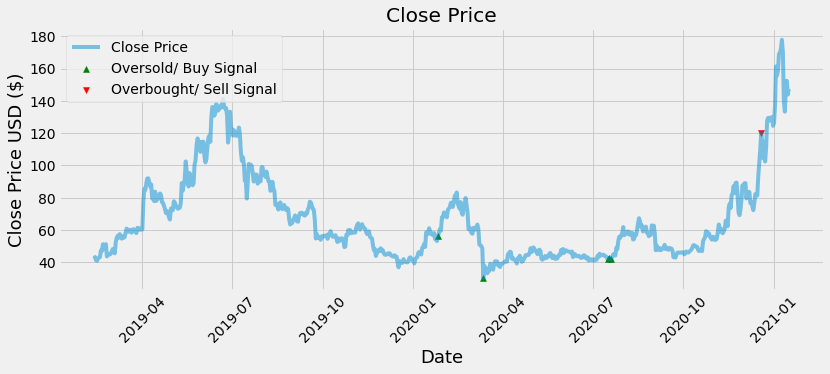

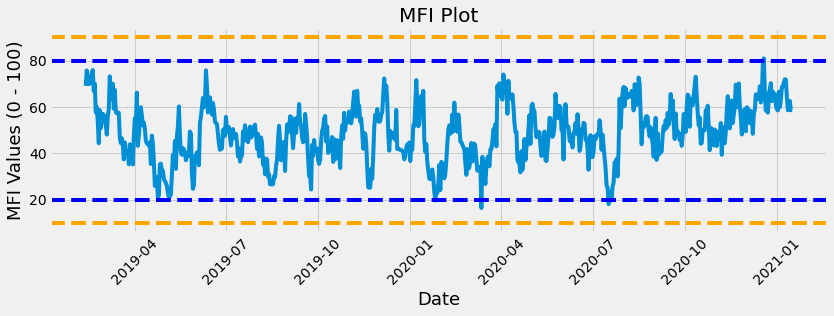

In [14]:
# plot the close price history
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['close'],alpha = 0.5, label='Close Price')
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label='Oversold/ Buy Signal', marker = '^', alpha = 1)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label='Overbought/ Sell Signal', marker = 'v', alpha = 1)
plt.title('Close Price')
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation = 45)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()
# plot the corresponding MFI values and significant levels
plt.figure(figsize=(12.4,3.5))
plt.title('MFI Plot')
plt.plot(new_df.index, new_df['MFI'])
plt.axhline(10, linestyle='--',color = 'orange') #Buy
plt.axhline(20, linestyle='--', color = 'blue') #Sell
plt.axhline(80, linestyle='--', color = 'blue') #Sell
plt.axhline(90, linestyle='--', color = 'orange') #Sell
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation = 45)
plt.ylabel('MFI Values (0 - 100)',fontsize=18)
plt.show()

In [15]:
# convert to csv
new_df.to_csv(r"mfi_ltc.csv", index = False)